# General Overview

This jupyter notebook is used to demonstrate the conversion of keras model (which was previously built in the first notebook) to MDF. This jupyter notebook will illustrate that the keras version and the MDF version produce the same result. We are going to get the keras model from keras_mdf file and use it to make prediction and also evaluate the MDF graph to make prediction with the same input data. The result of the keras and MDF model was then  compared and the graphical representation of the MDF model was generated and can also be compared with the graphical representation of  keras in the first notebook.

### Importing Libraries

In [ ]:
# importing libraries
import numpy as np
from keras_mdf import keras_model, converting_keras_mdf
from modeci_mdf.execution_engine import EvaluableGraph
import pandas as pd

### Create Input Data

In [9]:
# create input data
X=np.array(([0,0,1],[1,0,1],[1,1,1]), dtype=float)

### Fetcing keras model from the keras_mdf file

In [10]:
# feching keras model from the keras_mdf file
model =keras_model()

### Evaluating the MDF Model

In [12]:
# evaluating the model
keras_mdf, keras_mdf_graph = converting_keras_mdf(X)
eg =EvaluableGraph(keras_mdf_graph, verbose=False)
eg.evaluate()


Init graph: Implementing Keras in MDF
Evaluating graph: Implementing Keras in MDF, root nodes: ['input layer'], with array format numpy


### Comparing the result of keras prediction and MDF prediction

In [13]:
# comparing the result between keras and MDF prediction
keras_mdf_prediction=pd.DataFrame(X, columns=['X', 'Y', 'Z'])
keras_mdf_prediction['Expected_prediction'] =[0,0,0]
keras_mdf_prediction['keras_pred']=model.predict(X).round()
keras_mdf_prediction['MDF_pred']=eg.enodes["dense_2_activation"].evaluable_outputs["activation_2"].curr_value.round()
keras_mdf_prediction

1/1 [==============================] - 0s 280ms/step


,X,Y,Z,Expected_prediction,keras_pred,MDF_pred
0,0.0,0.0,1.0,0,0.0,0.0
1,1.0,0.0,1.0,0,0.0,0.0
2,1.0,1.0,1.0,0,0.0,0.0


Fom the result above, it can be seen that keras and MDF model produce the same output and the graph of the keras model in the previous notebook can also be compared to that of the MDF model below.

### Plotting the graph of the model

Converting MDF graph: Implementing Keras in MDF to graphviz (level: 4, format: png)
    Node: input layer
    Node: dense_layer
Converting .8 .8 .8 to hex color
    Node: dense_activation
    Node: dense_1_layer
Converting .8 .8 .8 to hex color
    Node: dense_1_activation
    Node: dense_2_layer
Converting .8 .8 .8 to hex color
    Node: dense_2_activation
    Edge: edge_input layer_dense_layer connects input layer to dense_layer
    Edge: edge_dense_layer_dense_activation connects dense_layer to dense_activation
    Edge: edge_dense_activation_dense_1_layer connects dense_activation to dense_1_layer
    Edge: edge_dense_1_layer_dense_1_activation connects dense_1_layer to dense_1_activation
    Edge: edge_dense_1_activation_dense_2_layer connects dense_1_activation to dense_2_layer
    Edge: edge_dense_2_layer_dense_2_activation connects dense_2_layer to dense_2_activation
Written graph image to: keras_mdf.png


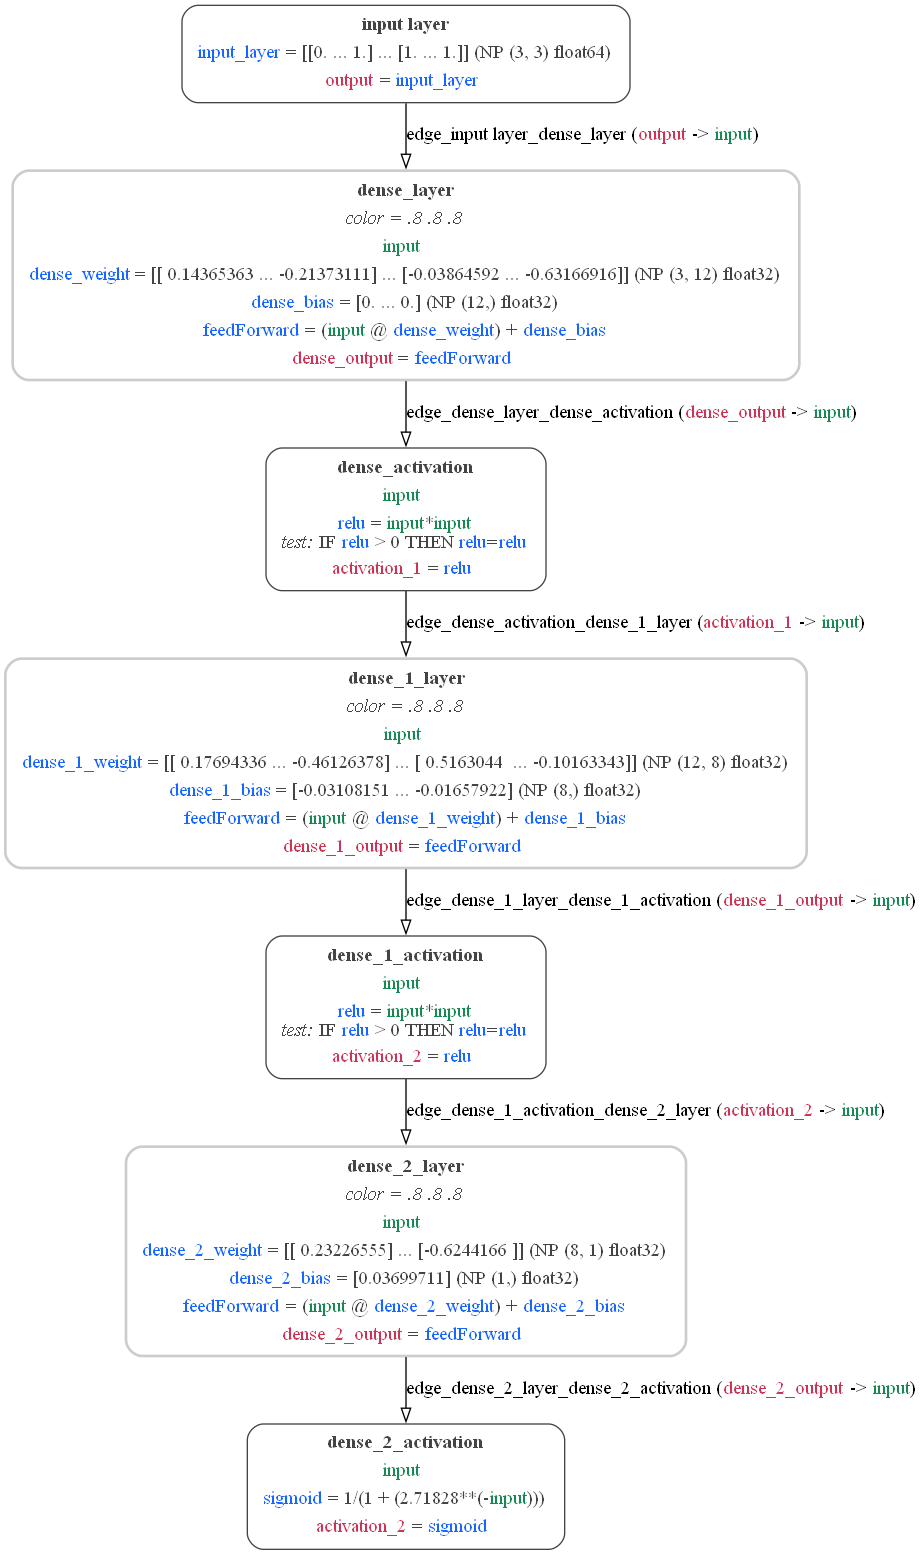

In [16]:
# Generating the graph 
keras_mdf.to_graph_image(
      engine="dot",
      output_format="png",
      view_on_render=False,
      level=4,
      filename_root="keras_mdf",
      is_horizontal=False
) # visualizing the graph
from IPython.display import Image
Image(filename="keras_mdf.png")